<font color='darkblue'><h1> Advertisment</h1></font>

We discussed in the lecture, whether spending on Ads($\$$). improve sales performance or not, we need to find how much should we spend on ads, would like to present similar case study

The data set contains information about money spent on advertisement and their generated sales. Money was spent on TV, radio and newspaper ads.

The objective is to use linear regression to understand how advertisement spending impacts sales.

1. Whether spending in advertisment impact sales? Linear Regression Problem
2. Try to answer what is the impact on sales through different channel, Case of Multiple Linear Regression We will discuss on next Lecture

<font color='blue'><h2> What is Regression?</h2></font>

We know, A function is set of ordered pairs of numbers (x,y), where value of y depend on x, describe kind of realationship between two variables

Hint: $$y = f(x)$$ where $$f(x) = \beta_0 + \beta_1 x$$

Intercept $\beta_0$ & Slope $\beta_1$ are the parameters, If these known you may find the value of $y$

Idea behind regression is to find the equation of the straight line that comes as close as possible to as many of the points as 
possible

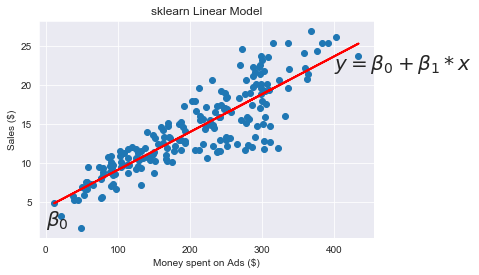

When you use regression to estimate the parameters $(x,y)$, you are estimating the parameters of the line that connects the mean $y$ at each location. Because the best that can be expected is to predict the mean for a certain location, researchers often write their regression models with an extra term, the error term $\epsilon$,

Hint: $$y = f(x)$$ where $$f(x) = \beta_0 + \beta_1 x + \epsilon$$

Assumption is $\epsilon$ error term should have constant mean and variance that follow normal distribution this is known as homoscedasticity into statistics

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(matplotlib.__version__)

1.0.1
1.18.1
0.10.0
3.1.0


In [3]:
# Preprocessing Input data
data = pd.read_csv('Advertising.csv')

In [4]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


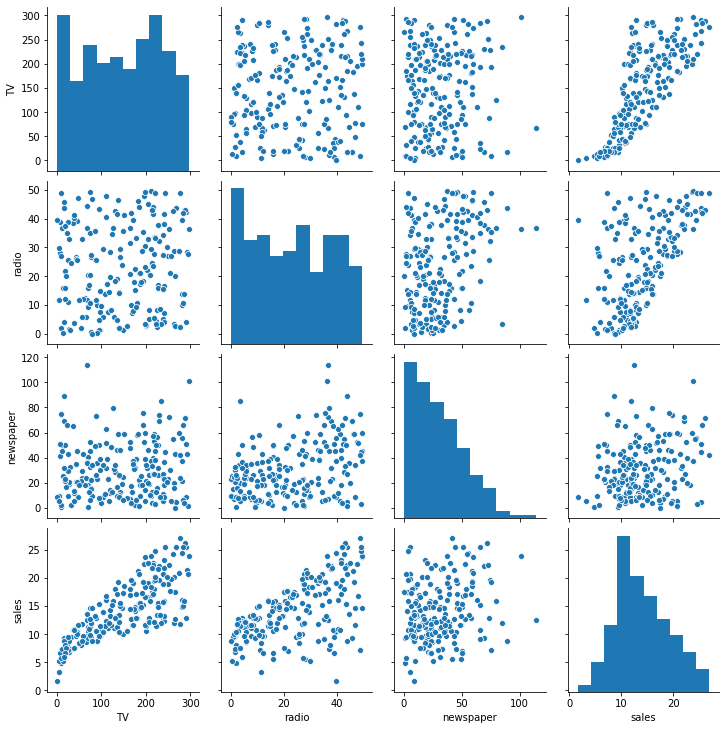

In [8]:
sns.pairplot(data)

In [9]:
mask  = np.triu(np.ones_like(data.corr())) #Created for upper traingluar matrix

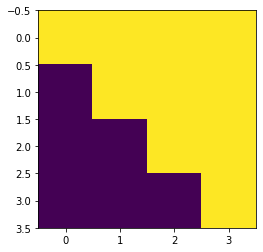

In [10]:
plt.imshow(mask)

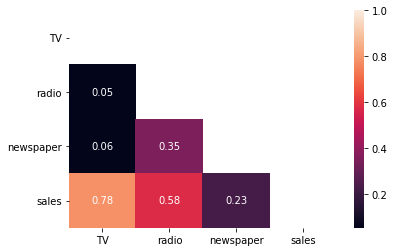

In [11]:
sns.heatmap(data.corr(), annot=True, fmt='.2f', mask=mask)

<font color='red' > What can we infer from above correlation map?

---

* _Create Additional feature which combine effect of all other explantory variable. called Advertisement (Adv)_
* _And then regress sales Vs Adv_

Hint: $$sales = \beta_0  + \beta_1 * Adv$$

_Notes: sales = y (reponse/dependent) & Adv = x (explantory/Independent)_
Hint: $$y = \beta_0  + \beta_1 * x$$

We need to find $$\hat{y}\approx \hat{\beta_0} + \hat{\beta_1} * x$$

To estimate $\beta_1$
$$\hat\beta_1 \approx \sum_{i=1}^{n}\frac{(\bar{x} - x)(\bar{y} - y)}{(\bar{x} - x)^2}$$

and $\beta_0$

$$\hat\beta_0 \approx y - \hat\beta_1 * x$$
Minimized the loss i.e MSE:
$$min\sum_{i=1}^{n}\frac{(y - \hat{y} )^2}{2n} \implies min\sum_{i=1}^{n}\frac{(y - (\beta_0 + \beta_1 \cdot x) )^2}{2n}$$

---

Compute Gradient Of MSE Loss Functions w.r.t $(\beta_0, \beta_1)$:

Hint: Use chain rule

$$\frac{d (MSE)}{d(\beta_0,\beta_1)}=\frac{d}{d(\beta_0,\beta_1)}\sum_{i=1}^{n}\frac{(y - \hat{y} )^2}{2n} =\frac{d}{d(\beta_0,\beta_1)}\sum_{i=1}^{n}\frac{(y - (\beta_0+\beta_1 \cdot x) )^2}{2n}$$

$$\frac{d(MSE)}{d \beta_0}=\frac{d}{d\beta_0}\sum_{i=1}^{n}\frac{(y - (\beta_0+\beta_1 \cdot x) )^2}{2n} = -2\sum_{i=1}^{n}\frac{(y - (\beta_0+\beta_1 \cdot x) )^2}{n}$$

And:

$$\frac{d(MSE)}{d \beta_1}=\frac{d}{d\beta_1}\sum_{i=1}^{n}\frac{(y - (\beta_0+\beta_1 \cdot x) )^2}{2n} = -2\sum_{i=1}^{n}\frac{(y - (\beta_0+\beta_1 \cdot x) )^2 \cdot x}{n}$$

---

Coefficent of Determination, describe proportion  of the dependent variable explained by the regression model.If the regression model is “perfect”, $SSE$ is zero, and $R^2$ is 1. If the regression model is a total failure, $SSE$ is equal to $SST$, no variance is explained by regression, and $R^2$ is zero.

Coefficient of Determination:  $$R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST}$$

Sum of Squares Total: $$SST = \sum(y-\bar{y})^2$$

Sum of Squares Regression: $$SSR = \sum(\hat{y}-\bar{y})^2$$

Sum of Squares Error: $$SSE = \sum(y-\hat{y})^2$$

<!--![image.png](attachment:image.png)-->

Reference Link: https://www.saedsayad.com/model_evaluation_r.htm

Anotherway to say: The coefficient of determination $R^2$ (or sometimes $r^2$) is another measure of how well the least squares performs as a predictor equation of $y$

---

In [12]:
data['Adv'] = data[['TV','radio','newspaper']].sum(axis=1) 

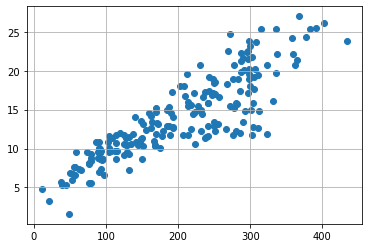

In [13]:
X = data.loc[:, 'Adv'].values
y = data.loc[:, "sales"].values
plt.scatter(X, y)
plt.grid('white')

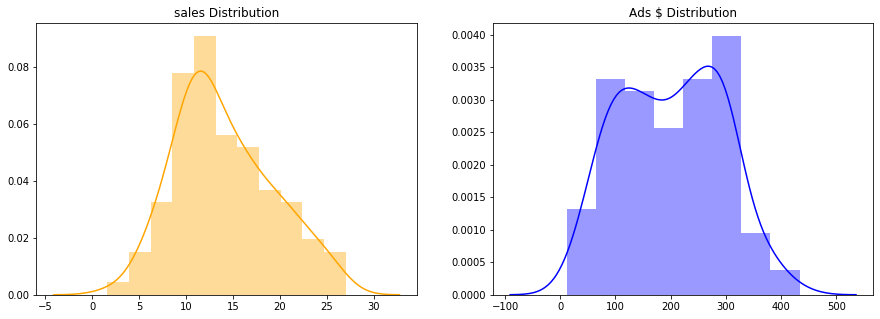

In [14]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.distplot(y, ax=ax[0], color ='orange')
ax[0].title.set_text('sales Distribution')

sns.distplot(X, ax=ax[1], color = 'blue')
ax[1].title.set_text('Ads $ Distribution')

In [15]:
def gradient_descent(X,y, learning_rate=0.001, epochs=100):
    
    """Gradient descent optimization"""
    
    # Define initial value
    weight = np.random.normal(0,1,1)[0] # initial weight
    bias = 0.2, # intial bias
    n = np.float(len(X))

    weight_lst = []
    bias_lst = []
    mse = []
    
    for i in range(epochs):
        
        y_hat = (weight * X)+ bias
        mse.append(np.sum(y_hat-y)**2/(2*n)) #Mean Squared Error
        
        D_m = (-2/n) * np.sum(X * (y - y_hat)) #derivative w.r.t beta_1
        D_c = (-2/n) * np.sum(y - y_hat) # Derivative w.r.t beta_0
        
        # new weigth and bias update
        weight_lst.append(weight)
        weight = weight - (learning_rate * D_m)
        
        bias_lst.append(bias[0])
        bias = bias - (learning_rate * D_c)
        
    return mse, weight_lst, bias_lst
#-----------

def r2(y_,y):
    """Coefficent of Determination, describe proportion  of the dependent variable explained by the regression model"""
    sst = np.sum((y-y.mean())**2)
    ssr = np.sum((y_-y)**2)
    r2 = 1-(ssr/sst)
    return(r2)
#----------

In [16]:
epochs = 5000
mse, weight, bias = gradient_descent(X,y, learning_rate=1e-8, epochs=epochs)

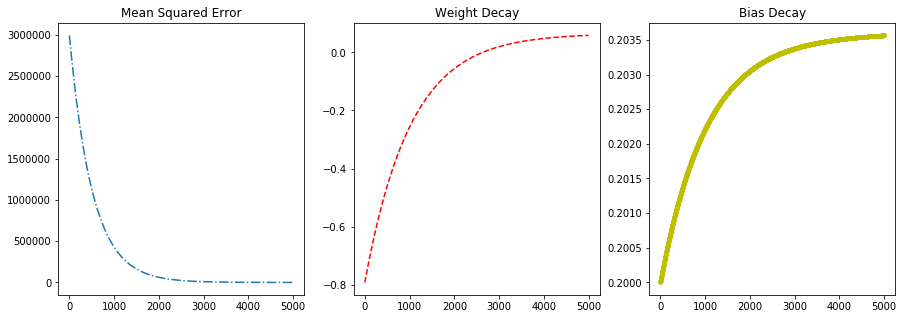

In [17]:
fig,ax  = plt.subplots(1,3, figsize=(15,5))
ax[0].plot(range(epochs),mse,'-.')
ax[0].title.set_text("Mean Squared Error")

ax[1].plot(range(epochs),np.array(weight), 'r--')
ax[1].title.set_text("Weight Decay")

ax[2].plot(range(epochs),np.array(bias), 'y.-')
ax[2].title.set_text("Bias Decay")


In [18]:
idx = np.argmin(mse)
idx

4999

In [19]:
weight[idx]

0.05885233816427127

In [20]:
bias[idx]

0.20356485345266478

In [21]:
y_hat = weight[idx]*X + bias[idx]

Text(0, 0.5, 'Sales ($)')

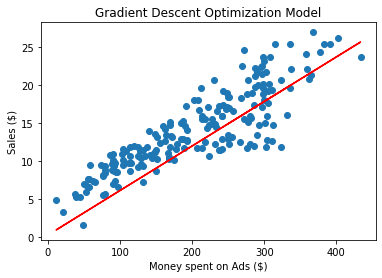

In [22]:
plt.scatter(X, y)
plt.plot(X, y_hat, 'r')
plt.title('Gradient Descent Optimization Model')
plt.xlabel("Money spent on Ads ($)")
plt.ylabel("Sales ($)")

---

<font color='blue'><h2> Using  Sklearn

In [23]:
from sklearn.linear_model  import LinearRegression

In [24]:
lmodel = LinearRegression()

In [25]:
new_X = data['Adv'].values.reshape(-1,1)
new_y = data['sales'].values.reshape(-1,1)
print(new_X.shape, new_y.shape)

(200, 1) (200, 1)


In [26]:
lmodel.fit(new_X, new_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
lmodel.coef_

array([[0.04868788]])

In [28]:
lmodel.intercept_

array([4.24302822])

In [29]:
y_pred = lmodel.predict(new_X)

In [30]:
print("The linear model Equation: [y = {:.5} + {:.5} * X]".format(lmodel.intercept_[0], lmodel.coef_[0][0]))

The linear model Equation: [y = 4.243 + 0.048688 * X]


Text(400, 22, '$y=\\beta_0 + \\beta_1*x$')

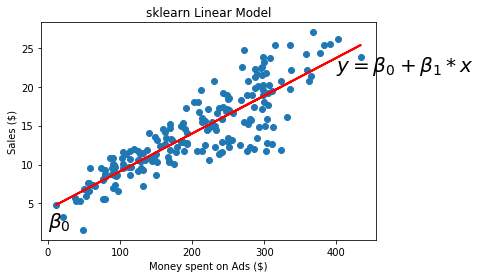

In [31]:
plt.scatter(data['Adv'], data['sales'])
plt.plot(data['Adv'], y_pred, c='r', linewidth=2)
plt.title('sklearn Linear Model')
plt.xlabel("Money spent on Ads ($)")
plt.ylabel("Sales ($)")
plt.text(0, 2,r"$\beta_0$", fontsize=20)
plt.text(400, 22,r"$y=\beta_0 + \beta_1*x$", fontsize=20)

---

<font color='blue'><h3> Model Comparison Gradient Vs Sklearn</h3></font>

Text(0, 0.5, 'Sales ($)')

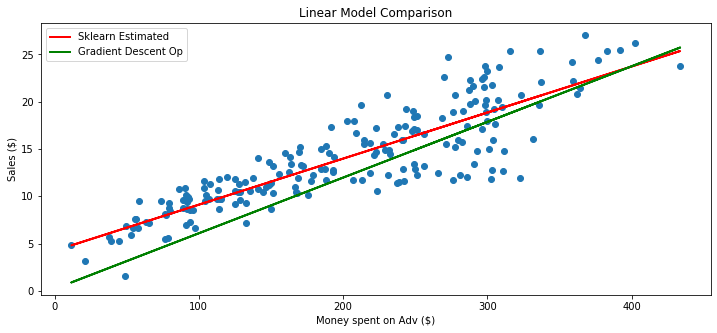

In [32]:
# Plot model side-side 
plt.figure(figsize=(12,5))
plt.scatter(data['Adv'], data['sales'], marker = 'o')
plt.plot(data['Adv'], y_pred, c='r', linewidth=2, label = 'Sklearn Estimated')
plt.plot(data['Adv'], y_hat, c='g', linewidth=2, label = "Gradient Descent Op")
plt.title('Linear Model Comparison')
plt.legend(loc='upper left')
plt.xlabel("Money spent on Adv ($)")
plt.ylabel("Sales ($)")

In [33]:
# Mean Squared Error
sklearn_mse = ((y_pred.reshape(-1) - y) **2).mean()
gd_mse = ((y_hat - y) **2).mean()

In [34]:
print("Sklearn Mean Squared Error: {}".format(sklearn_mse))
print("Gradient Descent Mean Squared Error: {}".format(gd_mse))

Sklearn Mean Squared Error: 6.692219880857797
Gradient Descent Mean Squared Error: 11.572355690455941


In [35]:
print("Sklearn R - Squared Error: {}".format(r2(y_pred.reshape(-1), y)))
print("Gradient Descent R-Squared : {}".format(r2(y_hat.reshape(-1), y)))

Sklearn R - Squared Error: 0.7529246402599598
Gradient Descent R-Squared : 0.5727510458170106


In [36]:
estimated_df = pd.DataFrame({'Actual':y,'Predicted_GD':y_hat,'Predicted_sklearn':y_pred.reshape(-1)})

In [37]:
estimated_df.head()

,Actual,Predicted_GD,Predicted_sklearn
0,22.1,20.042688,20.655712
1,10.4,7.789631,10.518896
2,9.3,7.995614,10.689303
3,18.5,14.993157,16.478292
4,12.9,14.916649,16.414998


---

In [38]:
# Residual plot
sk_error = estimated_df['Actual'] - estimated_df['Predicted_sklearn']
gd_error = estimated_df['Actual'] - estimated_df['Predicted_GD']

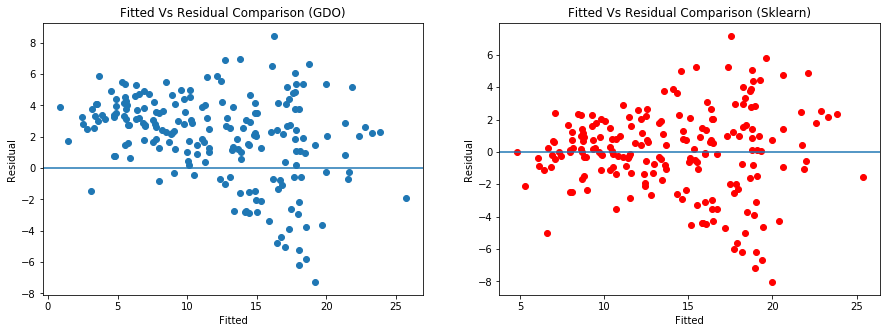

In [39]:
fig, ax= plt.subplots(1,2, figsize=(15,5))

ax[0].scatter(estimated_df['Predicted_GD'], gd_error, marker = 'o')
ax[0].set_title('Fitted Vs Residual Comparison (GDO)')
ax[0].set_xlabel("Fitted")
ax[0].set_ylabel("Residual")
ax[0].axhline(0.0)


ax[1].scatter(estimated_df['Predicted_sklearn'], sk_error, marker = 'o', c='r')
ax[1].set_title('Fitted Vs Residual Comparison (Sklearn)')
ax[1].set_xlabel("Fitted")
ax[1].set_ylabel("Residual")
ax[1].axhline(0.0)

<font color='red'><h3> Notes: </h4></font>
1. MSE of Sklearn mse is less than Gradient Descent Optimization(GDO)
2. GDO depend on model hyper parameters (learning_rate and no of epochs)
3. Futher when you study about hyper tuning

---

# Home Work
Try scaling your data and than perform Gradient Descent Optimization(GDO), define function for MinMaxScaler and standardscaler

Hint: $$\\MinMaxScaler = \frac{x_i - min(x)}{max(x)-min(x)}$$  

Values will be scaled between $$0\leq x\leq1$$

Feature standardization (or Z-score normalization) so that follow a standard normal distribution with $\mu$=0 and $\sigma$=1

where $\mu$ is the mean (average) and $\sigma$ is the standard deviation from the mean; standard scores (also called z scores) of the samples are calculated as follows: $$\\z = \frac{x-\mu}{\sigma}$$

Reference for features Scaling https://sebastianraschka.com/Articles/2014_about_feature_scaling.html

---

<font color='blue'><h3> Hypothesis Testing</h3></font>

So $$y= \begin{cases} {\beta_0} &\beta_1 = 0 \text{ i.e means y does not depends on x} \\{{\beta_0+\beta_1 \cdot x} } &\beta_1\ne 0\text{ some relationship between (x,y)}
\end{cases}$$

Null hypothesis will be $${H_o: \beta = 0} \\\text{There is no relationship between X and Y versus the alternative hypothesis}$$



Alternate hypothesis $${H_a: \beta \ne 0}\\\text{There is some relationship between X and Y} $$

To test the hypothesis. We compute a t-statistics

$$t = \frac{\hat\beta_1-0}{SE(\hat\beta_1)}$$

This will have a t-distribution with n - 2 degrees of freedom, assuming $\beta_1$ = 0.

Using computer it is easy to compute probability of observing any value equal to $|t|$ or larger. We
call this probability the p-value.

calculate:
$$SE(\hat\beta_1)^2=\frac{\sigma^2}{\sum_{i=1}^n{(x_i - \bar{x})}}$$

$$SE(\hat\beta_0)^2 = \sigma^2 [\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n{(x_i - \bar{x})}}]$$

where $$\sigma^2 = Var(\epsilon)$$

standard can be also used to compute confidence intervals. A 95% confidence interval is defined as a range of
values such that with 95% probability, the range will contain the true unknown value of the parameter. It has the form
 $$\hat\beta_1 \pm \ 2 \cdot SE(\hat\beta_1)$$
 
We will obtain above directly using statisical packages called $scipy.org$ or $statsmodels.org$

---

In [40]:
import statsmodels.api as sm

In [41]:
X = sm.add_constant(X)

In [42]:
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Tue, 17 Mar 2020   Prob (F-statistic):           5.06e-62
Time:                        23:24:40   Log-Likelihood:                -473.88
No. Observations:                 200   AIC:                             951.8
Df Residuals:                     198   BIC:                             958.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2430      0.439      9.676      0.0

In [43]:
#compare with
print("sklearn \t const: {} \t x1 : {}".format(lmodel.intercept_[0], lmodel.coef_[0][0]))
print("Gradient Optimization \t const: {} \t x1 : {}".format(bias[idx], weight[idx]))

sklearn 	 const: 4.243028216036329 	 x1 : 0.04868787931904815
Gradient Optimization 	 const: 0.20356485345266478 	 x1 : 0.05885233816427127


---

* [Reference Link:](https://stattrek.com/estimation/mean-difference-pairs.aspx?Tutorial=ap)

---

<font color='blue'><h2> Multiple Linear Regression</h2></font>

In Mulitple linear regression,We regress $y$ over $x_1,x_2...x_j$ and parameters $\beta_0, \beta_1, \beta_2 ... \beta_j$.

i.e: $$y = f(x) = \beta_0 + \beta_1*x_1 + \beta_2*x_2 ... \beta_j*x_j$$

We estimate $\beta_0, \beta_1, \beta_2 ... \beta_j$ as value to minimize the mean squared error, like we did in linear regression

Minimized the loss i.e MSE
$$min\sum_{i=1}^{n}\frac{(\hat{y} - y)^2}{2n}$$

Recall $R^2$, which represents proportion of total variation explain the response variable that is ‘accounted’ for by fitting the regression on x.

When we keep adding one or more predictor variable to the model, $R^2$ never decreases, it's keep increases even that variables does not explain the relationship, we need measure that penalize the models that contains redundant feature. Adjusted $R^2$ measure does not carry variation criteria and very useful for comparing models of  varying degree of complexity
 
$$Adjusted - R^2 = 1-\frac{\frac{SSE}{n-p-1}}{\frac{SST}{n-1}}$$

where $p$- number of predictor and $n$ - no of observation


---

In [44]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

In [45]:
data.head()

,TV,radio,newspaper,sales,Adv
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [46]:
X,Y = data[['radio','TV']],data['sales']

In [47]:
model = LinearRegression()
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
# Create a coordinate grid
Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(model.intercept_ + B1[i,j]*model.coef_[0] + B2[i,j]*model.coef_[1])

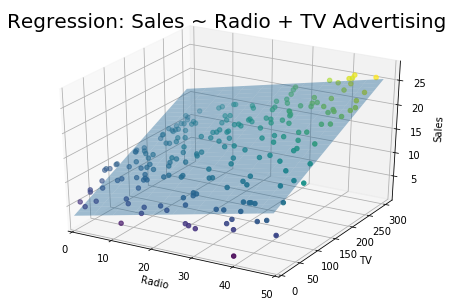

In [49]:
# Create plot
fig = plt.figure()
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)

ax = Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(data['radio'], data['TV'], data['sales'], c=data['sales'])

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(0)
ax.set_zlabel('Sales');

---

$$\text{Above 3D was to just show how plane looks in 3-Dimension plot, When we fit model with 2D feature space}$$

<font color='darkblue'><h2> Now Let's Fit Multiple Linear Regression Using Sklearn and GDO

In [50]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [51]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression

About Dataset:
    
The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables $$\text{Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (PE)}$$  of the plant.

A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.

For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.


In [52]:
data = pd.read_excel('Folds5x2_pp.xlsx')

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [54]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [55]:
mask  = np.triu(np.ones_like(data.corr())) #Created for upper traingluar matrix

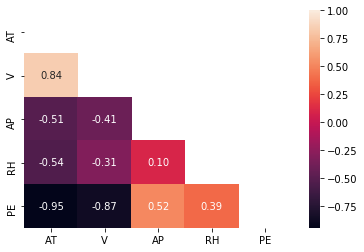

In [56]:
sns.heatmap(data.corr(), annot=True, fmt='.2f', mask=mask)

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
cols = data.columns
data[cols] =  StandardScaler().fit_transform(data)

In [59]:
data.describe()

,AT,V,AP,RH,PE
count,9.568000e+03,9.568000e+03,9.568000e+03,9.568000e+03,9.568000e+03
mean,-1.719813e-16,-2.600229e-16,5.504864e-15,-3.490855e-16,-1.781940e-15
std,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00
min,-2.394126e+00,-2.277901e+00,-3.430019e+00,-3.270589e+00,-1.998406e+00
25%,-8.240958e-01,-9.888705e-01,-7.003615e-01,-6.836860e-01,-8.563765e-01
50%,9.309729e-02,-1.751604e-01,-5.373067e-02,1.141150e-01,-1.649474e-01
75%,8.143721e-01,9.627745e-01,6.737290e-01,7.891378e-01,8.241478e-01
max,2.342804e+00,2.144779e+00,3.374760e+00,1.839173e+00,2.425568e+00


In [60]:
# Define loss Function
def mean_squarde_error(X,y, theta):
    m = len(y)
    J = np.sum((X.dot(theta) - y)**2)/(2*m)
    return J

#---------------------

# define gradient function
def gradient(theta, X, y, lr, epochs):
    
    mse_history = []
    theta_history = []    
    m  = len(y)

    for epoch in range(epochs):
        # loss
        error = X.dot(theta) - y
    
        # gradient
        gradient = X.T.dot(error)/m
        
        # new value of theta
        theta_history.append(theta)
        theta = theta - lr * gradient
        
        mse_history.append(mean_squarde_error(X, y, theta))
    
    return theta_history , np.array(mse_history)

#--------------------
# Predict Function
def predict(weights,Xtest):
    return Xtest.dot(weights)

#--------------------
# R-Squared Function
def r2(y_,y):
    sst = np.sum((y-y.mean())**2)
    ssr = np.sum((y_-y)**2)
    r2 = 1-(ssr/sst)
    return(r2)

#--------------------
# Adjusted R-Squared Function
def adjusted_r2(y_, y, p):
    n = len(y)
    sst = np.sum((y - y.mean())**2) / (n-1)
    sse = np.sum((y_ - y)**2) / (n-p-1)
    
    adjusted_r2 = 1 - (sse/sst)
    
    return(adjusted_r2)

In [61]:
X = data.iloc[:,:4] # Independent /predictor /explantory /feature space
y = data.iloc[:,-1] # Dependent /response /target 

In [62]:
# X.drop('V', axis=1, inplace=True)

In [63]:
# split train and test
index = np.random.randint(0,len(y), 2870) # create index id

Xtrain, Xtest = X.iloc[~X.index.isin(index)] , X.iloc[X.index.isin(index)]
ytrain, ytest = y.iloc[~y.index.isin(index)] , y.iloc[y.index.isin(index)]

In [64]:
X.shape

(9568, 4)

In [65]:
# initalize hyperparameter
theta = np.random.normal(0.0, 1.0, X.shape[1])
epochs = 5500
lr = 1e-3

In [66]:
# weights[0] array([ 0.44831277,  0.21589563,  0.25723439, -0.98954721])

In [67]:
%%time
weights, loss = gradient(theta=theta, X=Xtrain, y=ytrain,  lr=lr, epochs=epochs)

Wall time: 15.7 s


Text(0.5, 1.0, 'Gradient Loss Convergence')

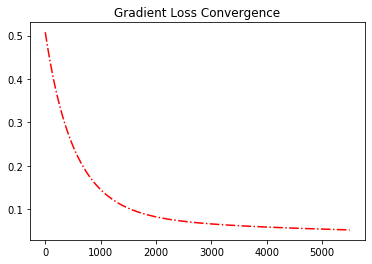

In [68]:
plt.plot(range(epochs), loss, 'r-.')
plt.title('Gradient Loss Convergence')

In [69]:
idx= loss.argmin()
print(weights[idx])

AT   -0.423311
V    -0.508430
AP    0.093460
RH    0.008744
dtype: float64


In [70]:
mean_squarde_error(Xtrain, ytrain, np.array(weights[idx])) # Mean Squared Error

0.05225003267110473

In [71]:
y_hat = predict(np.array(weights[loss.argmin()]), Xtest) # prediction

In [72]:
r2(y_hat,ytest)

0.8925499671832616

---

<font color='blue'><h3> Using Scipy API as Statmodels</h3></font>

In [73]:
import statsmodels.api as sm

In [74]:
model = sm.OLS(ytrain,Xtrain)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                     PE   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                          2.339e+04
Date:                Tue, 17 Mar 2020   Prob (F-statistic):                        0.00
Time:                        23:25:03   Log-Likelihood:                         -652.24
No. Observations:                7100   AIC:                                      1312.
Df Residuals:                    7096   BIC:                                      1340.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [75]:
y_pred  = results.predict(Xtest) # prediction on test data

---

<font color='blue'><h3> Comparison between Statmodels and Gradient Descent Optimization </h3></font>

In [76]:
#compare with
print("sklearn Coef_: {}".format(np.array(results.params)))
print("Gradient Optimization Coef_: {}".format(np.array(weights[idx])))

sklearn Coef_: [-0.86411842 -0.1717428   0.02361792 -0.13398434]
Gradient Optimization Coef_: [-0.42331084 -0.50842968  0.09346044  0.00874405]


In [77]:
print("Sklearn Mean Squared Error: {}".format(mean_squarde_error(Xtest, ytest, np.array(results.params))))
print("Gradient Descent Mean Squared Error: {}".format(mean_squarde_error(Xtest, ytest, np.array(weights[idx]))))

Sklearn Mean Squared Error: 0.037023114637549204
Gradient Descent Mean Squared Error: 0.053971566487276565


In [78]:
print("Sklearn R - Squared: {}".format(r2(y_pred, ytest)))
print("Gradient Descent R-Squared: {}".format(r2(y_hat, ytest)))

Sklearn R - Squared: 0.9262920248253245
Gradient Descent R-Squared: 0.8925499671832616


In [79]:
print("Sklearn Adjusted - R_squared: {}".format(adjusted_r2(y_pred, ytest, p= Xtest.shape[1])))
print("Gradient Descent Adjusted - R_squared: {}".format(adjusted_r2(y_hat, ytest, p= Xtest.shape[1])))

Sklearn Adjusted - R_squared: 0.9261723204401443
Gradient Descent Adjusted - R_squared: 0.892375464490908


---

<font color='blue'><h3>Testing for an Association Between a Subset of Predictor Variables and the Response</h3></font>

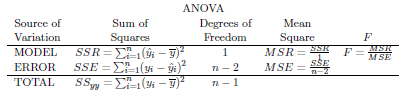

<font color='blue'> <h3>Multicollinearity</h3></font>

$$\text{Variance Inflation Factors}  - VIF_i = \frac{1}{1-R^2_i}$$

In [104]:
print("Sklearn R - Squared: {}".format( 1/(1 - r2(y_pred, ytest)) ))
print("Gradient Descent R-Squared: {}".format( 1/(1 - r2(y_hat, ytest)) ))

Sklearn R - Squared: 13.567052922430276
Gradient Descent R-Squared: 9.306651415412334


<font color='red'> <h3>Dummy Encoding</h2>

What if we have some categorical value as independent like $1-Male$ and $0-Female$

i.e: $$y =\begin{cases} \beta_0 \qquad \text{if x = Female}
\\ \beta_0+\beta_1 \cdot x \qquad \text{if x = Male}\end{cases}$$

To implement above equation, you have to convert categorical column into vectorize from like an example

Categorical = [1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1] 

Here 1-Male and 2-Female  

Male = [1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1]

Female = [0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0]

Now the equation form change to 

$$y = \beta_0 + \beta_1 \cdot Male + \beta_2 \cdot Female$$

Similarly you may transform the categorical columns having more than two categories, Below using pandas will show you how create dummy variables

In [94]:
pd.get_dummies([1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1],"Category").head()

,Category_1,Category_2
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


---

<font color='blue'><h2>Non Linear Regression</h2></font>

Till we study about linear relationship, but in real life there is non linear relationship which can in any form like Polynomial of $n-degree$ or kernel form

Example: Polynomial

$$ y = f(x) = \beta_0 + \beta_1 x_1 +\beta_2 x_2^{2}+ ...+\beta_n x_n^{n} \qquad \text{where polynomial degree can be 2,3,5,7..}$$

[Reference Links](http://www.tmpl.fi/gp/)

In [80]:
data = pd.read_csv('Notebooks/Data/Auto.csv')

In [81]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


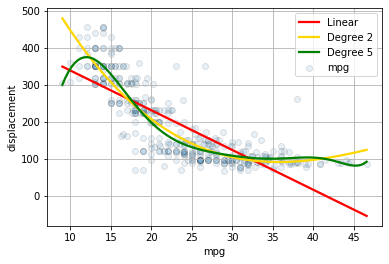

In [86]:
# plt.set_style()
plt.scatter(data['mpg'], data['displacement'], label='mpg',facecolors=None, edgecolors='k',alpha=0.1)
sns.regplot(data['mpg'], data['displacement'], label='Linear', color='red',ci=None, scatter=False)
sns.regplot(data['mpg'], data['displacement'], label='Degree 2',order=3, color='gold',ci=None, scatter=False)
sns.regplot(data['mpg'], data['displacement'], label='Degree 5',order=8, color='g',ci=None, scatter=False)
plt.legend()
plt.grid(True)
# plt.ylim(5,55)
# plt.xlim(40,240)

# End..